 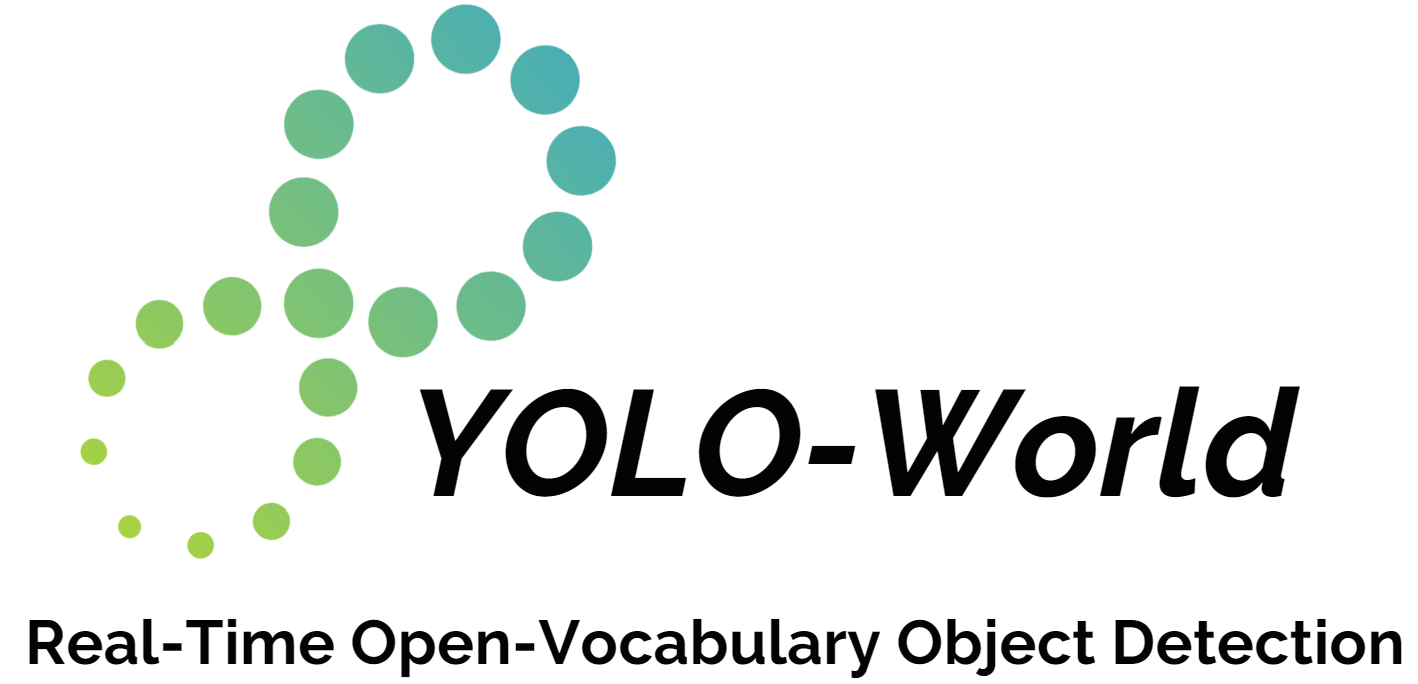


 This YOLO-World notebook is a Inferencing notebook presenting Real-Time Open-Vocabulary Object Detection.

We hope that the resources in this notebook will help you for inferencing.

## Setup

Clone GitHub [repository](https://github.com/AILab-CVC/YOLO-World) and install dependencies

In [1]:
!git clone --recursive https://github.com/AILab-CVC/YOLO-World
%cd YOLO-World/

Cloning into 'YOLO-World'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 297 (delta 74), reused 49 (delta 49), pack-reused 203
Receiving objects: 100% (297/297), 535.73 KiB | 2.16 MiB/s, done.
Resolving deltas: 100% (137/137), done.
Submodule 'third_party/mmyolo' (https://github.com/onuralpszr/mmyolo.git) registered for path 'third_party/mmyolo'
Cloning into '/content/YOLO-World/third_party/mmyolo'...
remote: Enumerating objects: 4944, done.        
remote: Counting objects: 100% (1388/1388), done.        
remote: Compressing objects: 100% (290/290), done.        
remote: Total 4944 (delta 1180), reused 1102 (delta 1098), pack-reused 3556        
Receiving objects: 100% (4944/4944), 3.61 MiB | 2.54 MiB/s, done.
Resolving deltas: 100% (3195/3195), done.
Submodule path 'third_party/mmyolo': checked out '4d97b3a06609dba94b8ec584be2f2029cfdb7519'
/content/YOLO-World


In [2]:
import os
# Install certain version of requests, tqdm, rich for openxlab (fix for yolo_world)
# Install mmcv before avoding compiling of mmcv and shortining waiting time installs "whl" file

if 'COLAB_GPU' in os.environ:
  !pip install requests==2.28.2 tqdm==4.65.0 rich==13.4.2 -q
  %pip install -U openmim -q
  !mim install "mmengine>=0.7.0" -q
  !mim install "mmcv" -q
else:
  !pip install torch wheel requests==2.28.2 tqdm==4.65.0 rich==13.4.2 -q

!pip install -e . -vv -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 16.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.28.2 which is incompatible.
yfinance 0.2.36 requires requests>=2.31, but you have requests 2.28.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 32.5 

In [3]:
# Restart colab session (required for mmengine)
quit()

## Pretrained Models

Download Pretrained weights from Huggingface and set configuration

In [2]:
import os

%cd YOLO-World/
if not os.path.exists("pretrained_weights"):
    os.makedirs("pretrained_weights")

# Download pretrained weights of YOLO-World-l model
!wget https://huggingface.co/spaces/stevengrove/YOLO-World/resolve/main/yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth?download=true
!mv yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth?download=true pretrained_weights/yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth

# Download config file
!wget https://huggingface.co/spaces/stevengrove/YOLO-World/resolve/main/configs/pretrain/yolo_world_l_t2i_bn_2e-4_100e_4x8gpus_obj365v1_goldg_train_lvis_minival.py?download=true
!mv yolo_world_l_t2i_bn_2e-4_100e_4x8gpus_obj365v1_goldg_train_lvis_minival.py?download=true configs/pretrain/yolo_world_l_t2i_bn_2e-4_100e_4x8gpus_obj365v1_goldg_train_lvis_minival.py
# !cp -r yolo_world_l_t2i_bn_2e-4_100e_4x8gpus_obj365v1_goldg_train_lvis_minival.py /configs/pretrain/

!wget https://media.roboflow.com/notebooks/examples/dog.jpeg

/content/YOLO-World
--2024-02-24 07:14:06--  https://huggingface.co/spaces/stevengrove/YOLO-World/resolve/main/yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth?download=true
Resolving huggingface.co (huggingface.co)... 13.33.33.110, 13.33.33.20, 13.33.33.55, ...
Connecting to huggingface.co (huggingface.co)|13.33.33.110|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/cc/e2/cce2cecbe61f2002bfd047dbb19558446e78db43c2b1c4a89071860f6eeb9a0e/c86e28e6f248ba6d5f5f83137f6968d53982c428f55e2a8c6d4edfa810c60658?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth%3B+filename%3D%22yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth%22%3B&Expires=1709018047&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwOTAxODA0N319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zL2NjL2UyL2NjZ

## Loading model configurations

In [3]:
import numpy as np
import torch
from mmengine.config import Config
from mmengine.dataset import Compose
from mmengine.runner import Runner
from mmengine.runner.amp import autocast
from mmyolo.registry import RUNNERS
from torchvision.ops import nms


if __name__ == "__main__":
    # load config
    cfg = Config.fromfile(
        "configs/pretrain/yolo_world_l_t2i_bn_2e-4_100e_4x8gpus_obj365v1_goldg_train_lvis_minival.py"
    )
    cfg.work_dir = "."
    cfg.load_from = "pretrained_weights/yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth"
    runner = Runner.from_cfg(cfg)
    runner.call_hook("before_run")
    runner.load_or_resume()
    pipeline = cfg.test_dataloader.dataset.pipeline
    runner.pipeline = Compose(pipeline)

    # run model evaluation
    runner.model.eval()

02/24 07:23:03 - mmengine - WARNING - Failed to search registry with scope "mmyolo" in the "log_processor" registry tree. As a workaround, the current "log_processor" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmyolo" is a correct scope, or whether the registry is initialized.
02/24 07:23:04 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 831378442
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 20

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


02/24 07:23:21 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
02/24 07:23:21 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
after_load_checkpoint:
(49          ) EMAHook                            
 -------------------- 
before_train:
(9           ) YOLOv5ParamSchedulerHook           
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHo

In [ ]:
def colorstr(*input):
    """
        Helper function for style logging
    """
    *args, string = input if len(input) > 1 else ("bold", input[0])
    colors = {"bold": "\033[1m"}

    return "".join(colors[x] for x in args) + f"{string}"

# Run Image Inference

In [8]:
import PIL.Image
import cv2
import logging
import supervision as sv

bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_position=sv.Position.CENTER)

class_names = ("person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, "
               "traffic light, fire hydrant, stop sign, parking meter, bench, bird, "
               "cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, "
               "backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, "
               "sports ball, kite, baseball bat, baseball glove, skateboard, "
               "surfboard, tennis racket, bottle, wine glass, cup, fork, knife, "
               "spoon, bowl, banana, apple, sandwich, orange, broccoli, carrot, "
               "hot dog, pizza, donut, cake, chair, couch, potted plant, bed, "
               "dining table, toilet, tv, laptop, mouse, remote, keyboard, "
               "cell phone, microwave, oven, toaster, sink, refrigerator, book, "
               "clock, vase, scissors, teddy bear, hair drier, toothbrush")

class_names2 = ("dog, eye, tongue, ear, leash")


def run_image(
        runner,
        input_image,
        max_num_boxes=100,
        score_thr=0.05,
        nms_thr=0.5,
        output_image="output.png",
):
    output_image = "runs/detect/"+output_image
    texts = [[t.strip()] for t in class_names.split(",")] + [[" "]]
    data_info = runner.pipeline(dict(img_id=0, img_path=input_image,
                                     texts=texts))

    data_batch = dict(
        inputs=data_info["inputs"].unsqueeze(0),
        data_samples=[data_info["data_samples"]],
    )

    with autocast(enabled=False), torch.no_grad():
        output = runner.model.test_step(data_batch)[0]
        runner.model.class_names = texts
        pred_instances = output.pred_instances

    # nms
    keep_idxs = nms(pred_instances.bboxes, pred_instances.scores, iou_threshold=nms_thr)
    pred_instances = pred_instances[keep_idxs]
    pred_instances = pred_instances[pred_instances.scores.float() > score_thr]

    if len(pred_instances.scores) > max_num_boxes:
        indices = pred_instances.scores.float().topk(max_num_boxes)[1]
        pred_instances = pred_instances[indices]
    output.pred_instances = pred_instances

    # predictions
    pred_instances = pred_instances.cpu().numpy()

    detections = sv.Detections(
        xyxy=pred_instances['bboxes'],
        class_id=pred_instances['labels'],
        confidence=pred_instances['scores']
    )

    # label ids with confidence scores
    labels = [
        f"{class_id} {confidence:0.2f}"
        for class_id, confidence
        in zip(detections.class_id, detections.confidence)
    ]

    # draw bounding box with label
    image = PIL.Image.open(input_image)
    svimage = np.array(image)
    svimage = bounding_box_annotator.annotate(svimage, detections)
    svimage = label_annotator.annotate(svimage, detections, labels)

    # save output image
    cv2.imwrite(output_image, svimage[:, :, ::-1])
    print(f"Results saved to {colorstr('bold', output_image)}")

    return svimage[:, :, ::-1]


Results saved to runs/detect/output.png


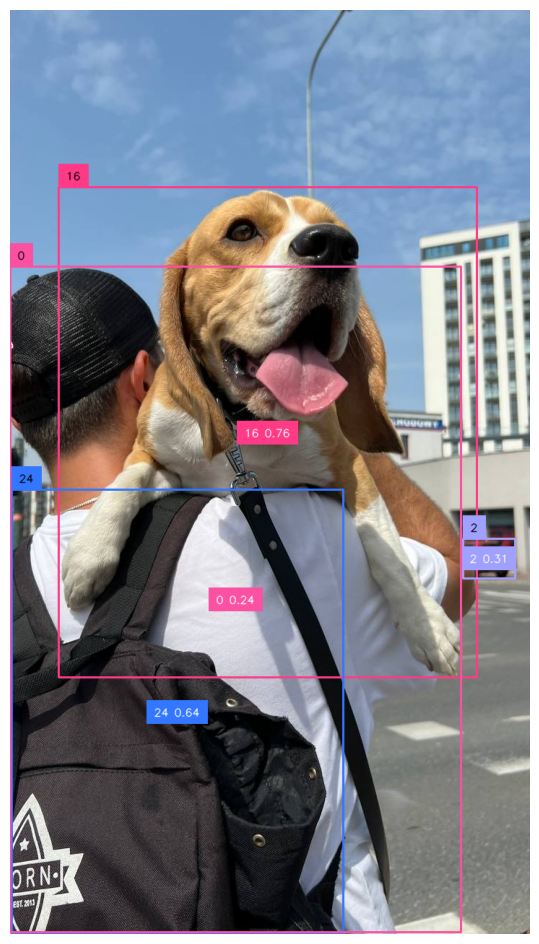

In [9]:
img = run_image(runner,"dog.jpeg")
sv.plot_image(img)